# Assignment
In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Split your data into train and test sets.
Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
Is the performance of your model satisfactory? Why?
Try to improve your model in terms of predictive performance by adding or removing some variables.
Please submit a link your work notebook. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to this example solution.

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine


In [40]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [41]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [42]:
houseprices_df1=houseprices_df #make a copy

In [43]:
houseprices_df1 = pd.concat([houseprices_df1,pd.get_dummies(houseprices_df1.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houseprices_df1 = pd.concat([houseprices_df1,pd.get_dummies(houseprices_df1.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houseprices_df1.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houseprices_df1.street, prefix="street", drop_first=True).columns)


# Build your initial model using these features and estimate the parameters using OLS.

In [59]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]
y = houseprices_df1.saleprice

Our R squared and Adj R squared 76.9% and 76.7% respectively. F stat is 482 with a significant p value of 0. Our AIC and BIC are 3.4 and 3.5. There's definitely room for improvement. Let's mix up our variables. 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [62]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     526.5
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:42:01   Log-Likelihood:                -13991.
No. Observations:                1168   AIC:                         2.800e+04
Df Residuals:                    1160   BIC:                         2.804e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.076e+05   6135.067  

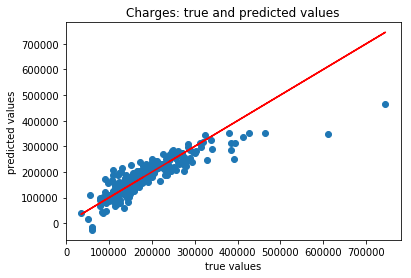

Mean absolute error of the prediction is: 25888.074035216123
Mean squared error of the prediction is: 1573412230.7081664
Root mean squared error of the prediction is: 39666.26060908901
Mean absolute percentage error of the prediction is: 15.99155046470519


In [63]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#There's some room for improvement. Our MAE, MSEP, RMSE and MAPE can be lowered. 

In [49]:
#Let's ty again with model #2. 

In [67]:
houseprices_df1 = pd.concat([houseprices_df1,pd.get_dummies(houseprices_df1.utilities, prefix="utilities", drop_first=True)], axis=1)
dummy_column_names =list(pd.get_dummies(houseprices_df1.utilities, prefix="utilities", drop_first=True).columns)
houseprices_df1 = pd.concat([houseprices_df1,pd.get_dummies(houseprices_df1.centralair, prefix="centralair", drop_first=True)], axis=1)
dummy_column_names =dummy_column_names+list(pd.get_dummies(houseprices_df1.centralair, prefix="centralair", drop_first=True).columns)

In [68]:
X = houseprices_df1[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_RL', 'lotarea', 'overallcond'] + dummy_column_names]
y = houseprices_df1.saleprice

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [71]:
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     438.3
Date:                Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:44:50   Log-Likelihood:                -13959.
No. Observations:                1168   AIC:                         2.794e+04
Df Residuals:                    1158   BIC:                         2.799e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.324e+05   8184.688  

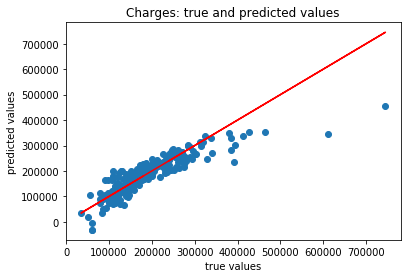

Mean absolute error of the prediction is: 25088.882169612425
Mean squared error of the prediction is: 1548233882.0676286
Root mean squared error of the prediction is: 39347.603256966344
Mean absolute percentage error of the prediction is: 15.32243692635398


In [72]:
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
#This model is better because the metrics are lower. There are some outliers which can affect our values. It might be 
#good to eliminate them and try again. 